In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
n_input = 2
n_samples = 128

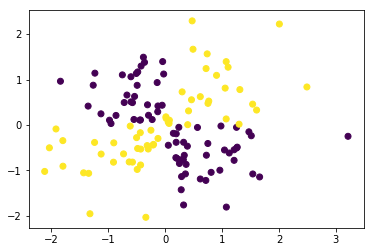

In [3]:
X = np.random.randn(n_samples, n_input)
Y = (X[:,0] * X[:,1] > 0).astype('float32')

plt.scatter(X[:,0], X[:,1], c=Y)

In [4]:
# Parameters
learning_rate = 0.1
training_epochs = 1500
# batch_size = 32
display_step = 100

In [5]:

x = tf.placeholder(tf.float32, shape=(None, n_input))
y = tf.placeholder(tf.float32, shape=(None))

# level 1

reg_1 = tf.Variable(tf.random_normal([n_input, 1], stddev=1))
reg_1_bias = tf.Variable(tf.random_normal([]))
gate_1 = tf.sigmoid(tf.matmul(x, reg_1) + reg_1_bias)

# level 2

x_l = tf.multiply(x, gate_1)
reg_2l = tf.Variable(tf.random_normal([n_input, 1], stddev=0.1))
reg_2l_bias = tf.Variable(tf.random_normal([]))
logit_2l = tf.matmul(x_l, reg_2l) + reg_2l_bias

x_r = tf.multiply(x, 1. - gate_1)
reg_2r = tf.Variable(tf.random_normal([n_input, 1], stddev=0.1))
reg_2r_bias = tf.Variable(tf.random_normal([]))
logit_2r = tf.matmul(x_r, reg_2r) + reg_2r_bias

logit_2 = logit_2l + logit_2r
gate_2 = tf.sigmoid(logit_2)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit_2, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [6]:
np.array([0, 5], dtype='float32')

array([ 0.,  5.], dtype=float32)

In [7]:
# and fixed?

x = tf.placeholder(tf.float32, shape=(None, n_input))
y = tf.placeholder(tf.float32, shape=(None))

# level 1

reg_1 = tf.Variable(np.array([[5], [0]], dtype='float32'))
reg_1_bias = 0
gate_1 = tf.sigmoid(tf.matmul(x, reg_1) + reg_1_bias)

# level 2

x_l = tf.multiply(x, gate_1)
reg_2l = tf.Variable(np.array([[0], [5]], dtype='float32'))
reg_2l_bias = 0
logit_2l = tf.matmul(x_l, reg_2l) + reg_2l_bias

x_r = tf.multiply(x, 1. - gate_1)
reg_2r = tf.Variable(np.array([[0], [-5]], dtype='float32'))
reg_2r_bias = 0
logit_2r = tf.matmul(x_r, reg_2r) + reg_2r_bias

#logit_2 = (logit_2l + logit_2r)[:,0]  # !!
logit_2 = tf.reshape(logit_2l + logit_2r, [-1]) # same
gate_2 = tf.sigmoid(logit_2)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit_2, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    pred, cost2 = sess.run([gate_2, cost], feed_dict={x: X, y: Y})
    print(cost2)

0.199017


In [9]:
(-Y * np.log(pred) - (1-Y) * np.log(1-pred)).mean()

0.19901696

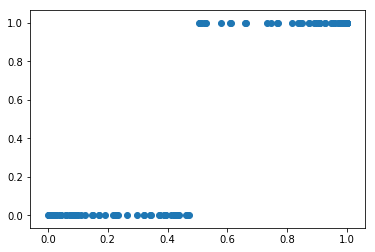

In [10]:
plt.scatter(pred, Y)

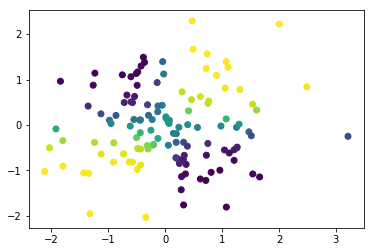

In [11]:
plt.scatter(X[:,0], X[:,1], c=pred)

In [12]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    preds = []
    
    for epoch in range(training_epochs):
        _, avg_cost, pred = sess.run([optimizer, cost, gate_2],
                                feed_dict={x: X, y: Y})
        preds.append(pred)

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            #plt.scatter(X[:,0], X[:,1], c=pred)
            #plt.show()
            
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Epoch: 0001 cost= 0.199016929
Epoch: 0101 cost= 0.084158584
Epoch: 0201 cost= 0.063658975
Epoch: 0301 cost= 0.051999122
Epoch: 0401 cost= 0.044037241
Epoch: 0501 cost= 0.038149782
Epoch: 0601 cost= 0.033621516
Epoch: 0701 cost= 0.030049199
Epoch: 0801 cost= 0.027172767
Epoch: 0901 cost= 0.024814432
Epoch: 1001 cost= 0.022849085
Epoch: 1101 cost= 0.021186929
Epoch: 1201 cost= 0.019762337
Epoch: 1301 cost= 0.018526569
Epoch: 1401 cost= 0.017442882
Optimization Finished!


In [13]:
# and now different
#
#

x = tf.placeholder(tf.float32, shape=(None, n_input))
y = tf.placeholder(tf.float32, shape=(None))

# level 1

reg_1 = tf.Variable(tf.random_normal([n_input, 1], stddev=1))
reg_1_bias = tf.Variable(tf.random_normal([]))
gate_1 = tf.sigmoid(tf.matmul(x, reg_1) + reg_1_bias)

# level 2

x_l = tf.multiply(x, gate_1)
reg_2l = tf.Variable(tf.random_normal([n_input, 1], stddev=1))
reg_2l_bias = tf.Variable(tf.random_normal([]))
logit_2l = tf.matmul(x_l, reg_2l) + reg_2l_bias

x_r = tf.multiply(x, 1. - gate_1)
reg_2r = tf.Variable(tf.random_normal([n_input, 1], stddev=1))
reg_2r_bias = tf.Variable(tf.random_normal([]))
logit_2r = tf.matmul(x_r, reg_2r) + reg_2r_bias

logit_2 = (logit_2l + logit_2r)[:,0]
gate_2 = tf.sigmoid(logit_2)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit_2, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

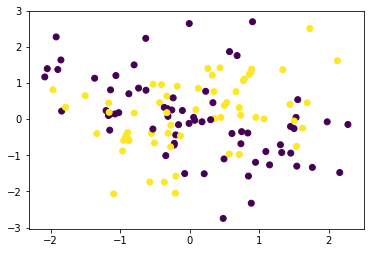

In [14]:
# and with noise

X = np.random.randn(n_samples, n_input)
Y = (X[:,0] * X[:,1] > 0).astype('float32')
X = X + 0.5 * np.random.randn(n_samples, n_input)

plt.scatter(X[:,0], X[:,1], c=Y)

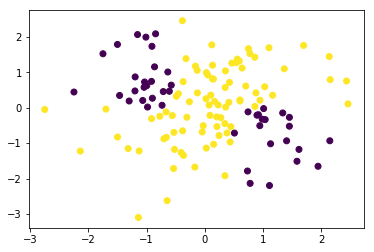

In [15]:
# or shifted

X = np.random.randn(n_samples, n_input)
Y = ((X[:,0] * X[:,1] > 0) | (np.abs(X[:,0]) < 0.5)).astype('float32')

plt.scatter(X[:,0], X[:,1], c=Y)

Epoch: 0001 cost= 0.967594504
gate 1	 [-0.26030263, -1.0475951] 2.20502
gate 2L	 [-1.1903871, -0.90324861] 2.20207
gate 2R	 [-0.4876889, 0.21343425] -0.235519
Epoch: 0101 cost= 0.139981359
gate 1	 [0.2393465, -8.213583] 0.326586
gate 2L	 [-4.88167, -0.51818866] 2.23485
gate 2R	 [5.900311, 0.8072713] -0.20274
Epoch: 0201 cost= 0.104594477
gate 1	 [0.31030202, -11.328264] 0.259707
gate 2L	 [-6.9462457, -0.71060079] 2.66675
gate 2R	 [7.9821482, 1.0660235] 0.229157
Epoch: 0301 cost= 0.085606486
gate 1	 [0.36401805, -14.674039] 0.172526
gate 2L	 [-8.5114555, -0.83476591] 3.01065
gate 2R	 [9.3804159, 1.173254] 0.573057
Epoch: 0401 cost= 0.070355199
gate 1	 [0.42236927, -18.23941] 0.110945
gate 2L	 [-9.9032412, -0.87127197] 3.36152
gate 2R	 [10.638277, 1.2013261] 0.92393
Epoch: 0501 cost= 0.058119517
gate 1	 [0.47852123, -21.673803] 0.0636344
gate 2L	 [-11.211905, -0.85016638] 3.72319
gate 2R	 [11.859659, 1.1856918] 1.2856
Epoch: 0601 cost= 0.048651561
gate 1	 [0.52903873, -24.793531] 0.02377

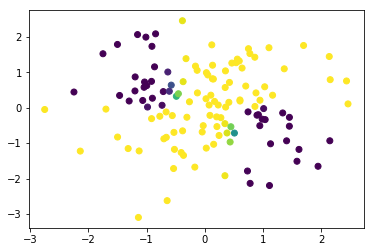

In [16]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    preds = []
    
    for epoch in range(training_epochs):
        _, avg_cost, pred = sess.run([optimizer, cost, gate_2],
                                feed_dict={x: X, y: Y})
        preds.append(pred)

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            parms = sess.run([reg_1, reg_1_bias, reg_2l, reg_2l_bias, reg_2r, reg_2r_bias])
            print("gate 1\t", list(parms[0][:,0]), parms[1])
            print("gate 2L\t", list(parms[2][:,0]), parms[3])
            print("gate 2R\t", list(parms[4][:,0]), parms[5])
            # plt.scatter(X[:,0], X[:,1], c=pred)
            # plt.show()
            
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
plt.scatter(X[:,0], X[:,1], c=preds[-1])